# Dependencias

In [108]:
import pandas as pd
import numpy as np
import re
import unicodedata
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
import nltk

import spacy
from spacy.lang.es import Spanish
from spacy.lang.es.stop_words import STOP_WORDS
from sklearn.feature_extraction.text import TfidfVectorizer

from wordcloud import WordCloud

from varclushi import VarClusHi

# Funciones

In [2]:
def clean_text(text, pattern="[^a-zA-Z ]"):
    cleaned_text = unicodedata.normalize('NFD', text).encode('ascii', 'ignore')
    cleaned_text = re.sub(pattern, "", cleaned_text.decode("utf-8"), flags=re.UNICODE)
    cleaned_text = u' '.join(cleaned_text.lower().split())
    return cleaned_text

In [3]:
def tokestem(x):
    stemmer = SnowballStemmer('spanish')
    a=word_tokenize(x)
    a=[stemmer.stem(i) for i in a]
    return a

# Lectura de Archivo

In [615]:
df=pd.read_csv('Experiencia de Empleado_6 diciembre 2021_16.43.csv')

C:\Users\VDMG015\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning:

Columns (4,5,6,12,13,14,26,29,33,39,40,41,42,43,44,47,48,49,54,77,78,79,90,105,108,112,113,114,115,116,117,118,119,122) have mixed types.Specify dtype option on import or set low_memory=False.



In [616]:
df=df.iloc[2:].reset_index(drop=True)

In [8]:
df.head()

StartDate              EndDate      Status        IPAddress  \
0  2020-05-18 11:53:23  2020-05-18 11:56:45  IP Address  189.216.140.252   
1  2020-05-18 11:53:34  2020-05-18 11:57:45  IP Address   189.144.186.31   
2  2020-05-18 11:51:13  2020-05-18 11:58:06  IP Address   187.216.195.65   
3  2020-05-18 11:52:39  2020-05-18 11:58:14  IP Address   200.68.128.166   
4  2020-05-18 11:55:25  2020-05-18 12:01:19  IP Address   187.216.195.65   

  Progress Duration (in seconds) Finished         RecordedDate  \
0      100                   202     True  2020-05-18 11:56:45   
1      100                   250     True  2020-05-18 11:57:45   
2      100                   412     True  2020-05-18 11:58:06   
3      100                   335     True  2020-05-18 11:58:15   
4      100                   353     True  2020-05-18 12:01:20   

          ResponseId RecipientLastName  ... LOCALIDAD SEXO   FECHA_NPS  \
0  R_1lo4jntp4eaVa47               NaN  ...       NaN  NaN  01/05/2020   
1  R_3EukWJsgTj4mo1o               NaN  ...       NaN  NaN  01/05/2020   
2  R_2tM78laEgyKYLHb               NaN  ...       NaN  NaN  01/05/2020   
3  R_5tZqAjD994I94I1               NaN  ...       NaN  NaN  01/05/2020   
4  R_eP24MdZFMUKNeyB               NaN  ...       NaN  NaN  01/05/2020   

                                          MEJORA_TXT PROCESO_TXT  \
0         Oportunidad/crecimiento laboral;desarrollo         NaN   
1    Herramientas adecuadas que faciliten el trabajo         NaN   
2  Evaluaciones de conocimientos y aptitudes,Plan...         NaN   
3  Mejorar/automatizar procesos internos/procedim...         NaN   
4  Cursos de actualizacion; motivacionales;lidera...         NaN   

                                             Mejoras fechayHora  \
0  Desarrollo del Personal/Capacitación/Crecimien...        NaN   
1  Homeoffice/Bonos de productividad/Herramientas...        NaN   
2  Abrir canales para expresar propuestas/Actuali...        NaN   
3  Comunicación efectiva/Capacitación funcional/E...        NaN   
4  Cursos excel, access/Cursos de actualizaciones...        NaN   

  mejoras_tramite mejoras atencion_cliente tramites  
0             NaN                      NaN      NaN  
1             NaN                      NaN      NaN  
2             NaN                      NaN      NaN  
3             NaN                      NaN      NaN  
4             NaN                      NaN      NaN  

[5 rows x 133 columns]

# Text

In [16]:
a=df[df['Q4'].notna()]['Q4']

## Stemming, Lematización

In [17]:
stemmer = SnowballStemmer('spanish')

In [18]:
nlp = spacy.load('es_core_news_sm')

In [20]:
# Lemma + Stemming
#df['text']=df['no_sol'].str.replace("\n", "").map(nlp).map(lambda x:[w.lemma_ for w in x]).apply(" ".join).map(clean_text).map(tokestem).str.join(" ")
# Stemming
b=a.str.replace("\n", "").map(clean_text).map(tokestem).str.join(" ")

In [23]:
ct=pd.concat([a,b],axis=1)

In [24]:
ct.columns=['Text','Clean_Text']

In [31]:
ct.head()

Text  \
0            Capacitación y desarrollo del personal\n   
1                    Capacitación y trabajo en equipo   
9   Falta planeación de las carreras de los emplea...   
18                          Depende el área a laborar   
22  Eliminar un poco la democracia entre las áreas...   

                                           Clean_Text  
0               capacitacion y desarroll del personal  
1                      capacitacion y trabaj en equip  
9   falt planeacion de las carrer de los emple y d...  
18                              depend el are a labor  
22  elimin un poc la democraci entre las are integ...

## Stop Words

In [27]:
sw=list(STOP_WORDS.union(set(stopwords.words('spanish'))))

In [26]:
#sw=list(set([w.lemma_ for w in nlp(" ".join(sw))]))

In [28]:
sw=list(pd.Series(sw).map(clean_text))

In [29]:
stemmer = SnowballStemmer('spanish')
sw=list(set([stemmer.stem(i) for i in sw]))

## Modificaciones

In [123]:
sw.append('deberi')
sw.append('telcel')
sw.append('falt')
sw.append('empres')

sw.append('pod')
#sw.append('quer')
sw.append('renov')
sw.append('renovacion')
sw.append('dec')
sw.append('dar')
sw.append('telcel')
#sw.append('equip')
#sw.append('ten')
#sw.append('cotiz')
sw.append('apart')
sw.append('no')
sw.append('quer')
sw.append('centr')
sw.append('plan')
sw.append('cambi')
sw.append('queri')

sw.remove('hab')

## Stop Words Check 

In [342]:
Sw=pd.Series(sw)

In [343]:
Sw[Sw.str.contains('cuo')]

Series([], dtype: object)

In [344]:
sw

['ayer',
 'hubim',
 'ejempl',
 'trabaj',
 'con',
 'qued',
 'pod',
 'haz',
 'bastant',
 'hayais',
 'hub',
 'rar',
 'pes',
 'sea',
 'dias',
 'much',
 'asegur',
 'usais',
 'sois',
 'dich',
 'respect',
 'cinc',
 'cuatr',
 'tempran',
 'habeis',
 'habl',
 'grand',
 'nuev',
 'ultim',
 'parec',
 'ahor',
 'el',
 'trabajai',
 'hor',
 'tuvies',
 'cuand',
 'estariais',
 'habr',
 'algo',
 'haci',
 'pues',
 'hoy',
 'todavi',
 'maner',
 'nosotr',
 'embarg',
 'tuvieram',
 'o',
 'tras',
 'conoc',
 'lueg',
 'trat',
 'podei',
 'estais',
 'emple',
 'arrib',
 'fuim',
 'sereis',
 'demasi',
 'bien',
 'adem',
 'ocho',
 'adel',
 'baj',
 'general',
 'podriais',
 'que',
 'delant',
 'fuisteis',
 'vari',
 'habreis',
 'segun',
 'menud',
 'este',
 'ir',
 'contr',
 'manifest',
 'hubies',
 'asi',
 'mientr',
 'peor',
 'part',
 'hubiesei',
 'a',
 'soy',
 'tampoc',
 'hast',
 'expres',
 'cualqu',
 'agreg',
 'tant',
 'encim',
 'ya',
 'principal',
 'dem',
 'clar',
 'anad',
 'igual',
 'entonc',
 'estari',
 'pon',
 'trav',
 '

In [345]:
sw.remove('tiemp')

ValueError: list.remove(x): x not in list

In [346]:
for i in 'des hac renovacion anticip de mi mism plan con cambi de equip y ahor'.split():
    sw.append(i)

In [371]:
sw.remove('equip')

In [372]:
sw.remove('ten')

In [350]:
for i in 'venc el proxim mes'.split():
    sw.append(i)

In [351]:
sw.remove('estar')

ValueError: list.remove(x): x not in list

In [352]:
sw.append('uno')

## TFIDF

In [131]:
#vect = TfidfVectorizer(min_df=70, ngram_range=(1,3))
vect = TfidfVectorizer(min_df=20, ngram_range=(1,3), stop_words=list( sw))

In [132]:
X=vect.fit_transform(ct['Clean_Text'])

In [133]:
X.shape

(1142, 78)

## VarClusHi

In [127]:
vc = VarClusHi(df=pd.DataFrame(X.todense(),columns=vect.get_feature_names()),feat_list=vect.get_feature_names())
vc.varclus()
rs = vc.rsquare.sort_values(by=['Cluster','RS_Ratio'])
best_cv = rs.groupby('Cluster').first()['Variable'].to_list()


In [128]:
rs.style.background_gradient()

In [134]:
X=pd.DataFrame(X.todense(),columns=vect.get_feature_names())

In [135]:
X.head()

activ  ambient  ambient laboral  anal  anos  apoy       are  ascens  \
0    0.0      0.0              0.0   0.0   0.0   0.0  0.000000     0.0   
1    0.0      0.0              0.0   0.0   0.0   0.0  0.000000     0.0   
2    0.0      0.0              0.0   0.0   0.0   0.0  0.554761     0.0   
3    0.0      0.0              0.0   0.0   0.0   0.0  0.545053     0.0   
4    0.0      0.0              0.0   0.0   0.0   0.0  1.000000     0.0   

   atencion  bas  ...  salari  servici  sistem  sub  sueld  tem  tom  \
0       0.0  0.0  ...     0.0      0.0     0.0  0.0    0.0  0.0  0.0   
1       0.0  0.0  ...     0.0      0.0     0.0  0.0    0.0  0.0  0.0   
2       0.0  0.0  ...     0.0      0.0     0.0  0.0    0.0  0.0  0.0   
3       0.0  0.0  ...     0.0      0.0     0.0  0.0    0.0  0.0  0.0   
4       0.0  0.0  ...     0.0      0.0     0.0  0.0    0.0  0.0  0.0   

   vacacion  vacant  vid  
0       0.0     0.0  0.0  
1       0.0     0.0  0.0  
2       0.0     0.0  0.0  
3       0.0     0.0  0.0  
4       0.0     0.0  0.0  

[5 rows x 78 columns]

In [64]:
X[best_cv].head()

hom offic  oportun crecimient  recurs human  ambient  flexibil  intern  \
0        0.0                 0.0           0.0      0.0       0.0     0.0   
1        0.0                 0.0           0.0      0.0       0.0     0.0   
2        0.0                 0.0           0.0      0.0       0.0     0.0   
3        0.0                 0.0           0.0      0.0       0.0     0.0   
4        0.0                 0.0           0.0      0.0       0.0     0.0   

   gerent  vid  gener  horari  ...  polit  sistem  sub  colabor  cultur  tom  \
0     0.0  0.0    0.0     0.0  ...    0.0     0.0  0.0      0.0     0.0  0.0   
1     0.0  0.0    0.0     0.0  ...    0.0     0.0  0.0      0.0     0.0  0.0   
2     0.0  0.0    0.0     0.0  ...    0.0     0.0  0.0      0.0     0.0  0.0   
3     0.0  0.0    0.0     0.0  ...    0.0     0.0  0.0      0.0     0.0  0.0   
4     0.0  0.0    0.0     0.0  ...    0.0     0.0  0.0      0.0     0.0  0.0   

   crecimient laboral  gent     labor  nivel  
0                 0.0   0.0  0.000000    0.0  
1                 0.0   0.0  0.000000    0.0  
2                 0.0   0.0  0.000000    0.0  
3                 0.0   0.0  0.838402    0.0  
4                 0.0   0.0  0.000000    0.0  

[5 rows x 33 columns]

In [41]:
from sklearn.preprocessing import MinMaxScaler

## Singular Value Descomposition

In [205]:
from sklearn.decomposition import TruncatedSVD

# SVD represent documents and terms in vectors 
svd_model = TruncatedSVD(n_components=7, algorithm='randomized', n_iter=100, random_state=0)

svd_model.fit(X)

len(svd_model.components_)

7

## Tópicos

In [206]:
terms = vect.get_feature_names()

for i, comp in enumerate(svd_model.components_):
    terms_comp = zip(terms, comp)
    sorted_terms = sorted(terms_comp, key= lambda x:x[1], reverse=True)[:7]
    print("Topic "+str(i)+": ")
    for t in sorted_terms:
        print(t[0])
        print(" ")

Topic 0: 
equip
 
asesor
 
pag
 
sistem
 
ofrec
 
dispon
 
compr
 
Topic 1: 
sistem
 
asesor
 
informacion
 
atencion
 
servici
 
pag
 
tramit
 
Topic 2: 
sistem
 
equip
 
problem
 
financi
 
esper
 
enganch
 
adquir equip
 
Topic 3: 
asesor
 
sistem
 
equip
 
existent
 
inter
 
groser
 
sup
 
Topic 4: 
informacion
 
falt
 
solicit
 
existent
 
equip
 
atencion
 
dispon
 
Topic 5: 
atencion
 
pesim
 
client
 
servici
 
equip
 
actitud
 
groser
 
Topic 6: 
ofrec
 
opcion
 
telefon
 
informacion
 
promocion
 
sistem
 
cost
 


## Tabla Texto-Tópico

In [207]:
aux=pd.concat([pd.Series(np.argmax(svd_model.transform(X),axis=1)),pd.Series(np.sum(svd_model.transform(X),axis=1)),df['text'].reset_index(drop=True),df['no_sol'].reset_index(drop=True)],axis=1)

In [208]:
aux.columns=['Tema','aux','Texto','Texto1']

In [209]:
aux['Tema1']=pd.Series(map(lambda x,y: 7 if y==0 else x, aux['Tema'],aux['aux']))

## Documentos por tópico

In [283]:
aux['Tema1'].value_counts()

0    1872
1    1599
7     560
6     412
5     292
4     283
2     222
3     120
Name: Tema1, dtype: int64

## Validación

In [301]:
aux[aux['Tema1']==5]['Texto1'].sample(15).values

array(['No los conté exactamente pero más o menos serían 20 empleados y tres o cuatro clientes \nDefinitivamente la atención es nefasta \nY creo les falta preparación y amabilidad!!',
       'Por que llevo varios días buscando un equipo de la marca samsum y en ni gun sentro de atención hay y ni fecha tienen de entrega ',
       'Al momento de cambiar el titular elevaron el precio del plan sin ningún beneficio extra y la atención de la persona que atendía no se veía interesada en ayudarme a resolver el problema ',
       'Pésimo servicio en general ! Cobros excesivos y la red es pésima ',
       'Tuve que salir de la tienda por la pésima atención de la Gerente de la tienda grosera y prepotente le falto al respeto a mi familia son un asco de sucursal por culpa de personal ',
       'Se supone que ya puedo renovar plan y el miércoles me dijeron en un centro de atención que no se podía conteste está encuesta y me llaman  el jueves de esta semana para decirme que sí puedo renovar y al acudi

In [285]:
aux

Tema       aux                                              Texto  \
0        0  0.505889                       no teni el equip en existent   
1        0  0.441241  quier renov mi plan per requier el equip xiaom...   
2        2  1.683986  por que al parec el sistem no le permiti actua...   
3        1  0.544591  atencion del asesor nunc estuv dispuest a acla...   
4        0  0.271735                          falt de clarid y de equip   
...    ...       ...                                                ...   
5355     0  0.258562  sol me coment que ya no podri adquir un equip ...   
5356     1  0.009696  fui hac la cancelacion de mi plan por que otra...   
5357     5  0.407636  no hub senal de internet y no recibi atencion ...   
5358     3  0.361208  el telcel up es un engan rob el diner y no cum...   
5359     0  0.554444                           no estab dispon el equip   

                                                 Texto1  Tema1  
0                    No tenían el equipo en existencia       0  
1     Quiero renovar mi plan, pero Requiero el equip...      0  
2     Por qué al parecer el sistema no le permitía a...      2  
3     Atencion del asesor, nunca estuvo dispuesto a ...      1  
4                      Falta de claridad y de equipos\n      0  
...                                                 ...    ...  
5355  Solo me comentaron que ya no podría adquirir u...      0  
5356  Fui hacer la cancelación de mi plan por que ot...      1  
5357  No hubo señal de internet y no recibí atención...      5  
5358  El Telcel up es un engaño, roban el dinero y n...      3  
5359                     No estaba disponible el equipo      0  

[5360 rows x 5 columns]

In [294]:
df=df.reset_index(drop=True)

In [295]:
df['Tema']=aux['Tema1']

In [303]:
df['Tema']=df['Tema'].replace({0:'Falta de Equipo/Equipo Forzoso',1:'Asesor Mal Informado/Burocracia',2:'Fallas en el Sistema',3:'Actitud',4:'Malos Entendidos',5:'Mala Atención/Mal Servicio',6:'No Hubo Oferta de Alternativas',7:'No Clasificado'})

In [304]:
df.index=pd.read_pickle('No_solucion.pkl').index

In [306]:
df.to_pickle('Temas_No_sol.pkl')

In [214]:
aux['Texto1'].loc[3252]

'Comentaron que por las nuevas políticas de la empresa aún no puedo renovar mi plan aunque quiera dar el monto de penalización para renovarlo cuando yo quiera'

In [147]:
aux['Texto'].loc[2225]

'no hay promocion cad ves mas car'

In [273]:
aux[aux['Texto1']=='Me querían cobrar una cuota por renovar mi plan anticipadamente ya qué vence el próximo mes ']

Tema       aux                                              Texto  \
2680     0 -0.143969  yo quer cobr uno cuot por renov mi plan antici...   

                                                 Texto1  Tema1  
2680  Me querían cobrar una cuota por renovar mi pla...      0

In [ ]:
X=X[best_cv]

# Clusterización de Texto

In [88]:
from sklearn.mixture import GaussianMixture
import cufflinks as cf
from sklearn.metrics import davies_bouldin_score, silhouette_score, silhouette_samples
import matplotlib.pyplot as plt

cf.go_offline()

## Preprocesamiento

In [89]:
mm=MinMaxScaler()

In [136]:
mm.fit(X)

MinMaxScaler()

In [137]:
X=pd.DataFrame(mm.transform(X),columns=X.columns)

## Cantidad de Clusters

In [138]:
sse,db,slc = {}, {}, {}
for k in range(2, 50):
    cluster = GaussianMixture(n_components=k, max_iter=1000, random_state=10).fit(X)
    clusters = cluster.predict(X)
    db[k] = davies_bouldin_score(X,clusters)
    slc[k] = silhouette_score(X,clusters)

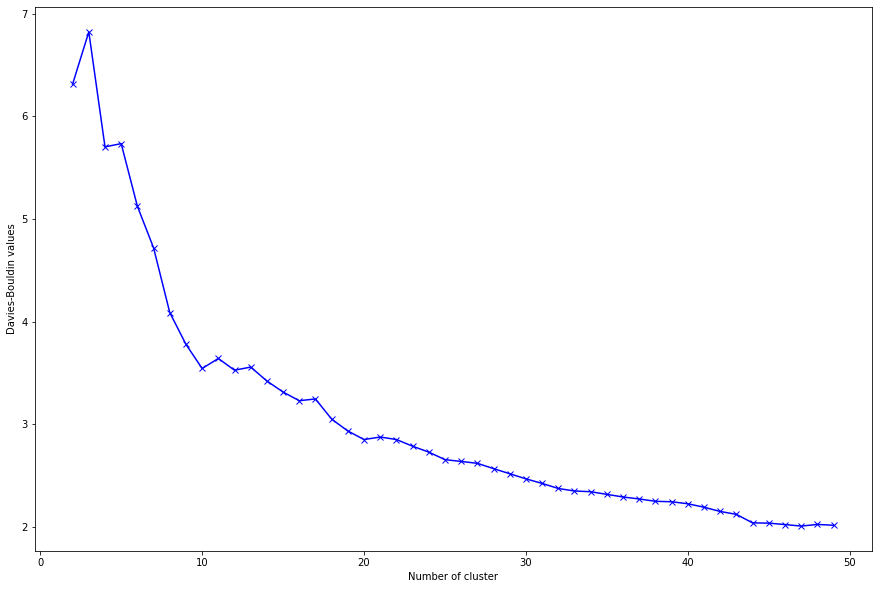

In [139]:
plt.figure(figsize=(15,10))
plt.plot(list(db.keys()), list(db.values()), "bx-")
plt.xlabel("Number of cluster")
plt.ylabel("Davies-Bouldin values")
plt.show()

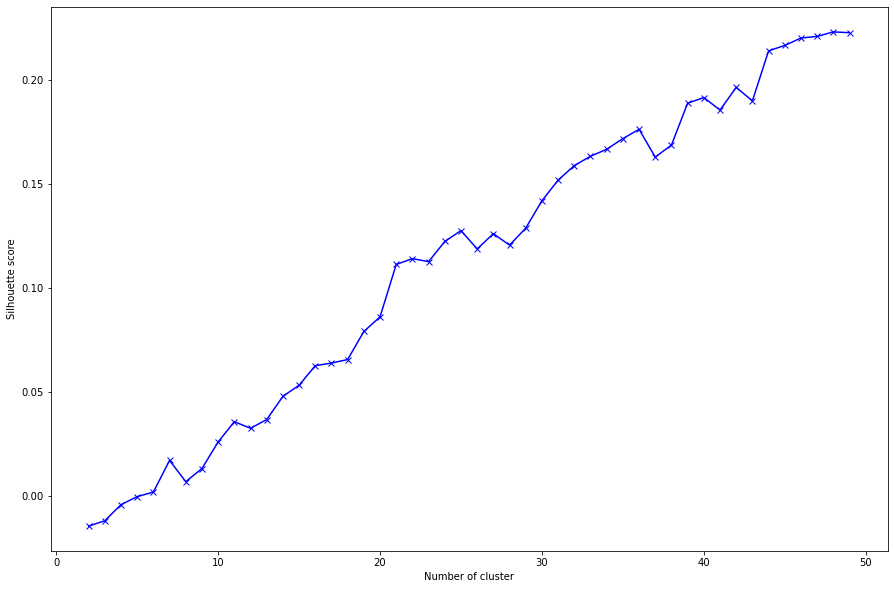

In [140]:
plt.figure(figsize=(15,10))
plt.plot(list(slc.keys()), list(slc.values()), "bx-")
plt.xlabel("Number of cluster")
plt.ylabel("Silhouette score")
plt.show()

In [141]:
k = 21

## Fit

In [142]:
cl = GaussianMixture(n_components=k)
cl.fit(X)

GaussianMixture(n_components=21)

In [147]:
ct=ct.reset_index()

index                                               Text  \
0         0           Capacitación y desarrollo del personal\n   
1         1                   Capacitación y trabajo en equipo   
2         9  Falta planeación de las carreras de los emplea...   
3        18                          Depende el área a laborar   
4        22  Eliminar un poco la democracia entre las áreas...   
...     ...                                                ...   
1137   8045     Mejorar el criterio para aumento de categorías   
1138   8051                          CAPACITACION DE PERSONAL    
1139   8053  SUELDO PRESTACIONES Y UN MEDICO EN LAS INSTALA...   
1140   8058  Ajustar sueldos para personal que ingreso de o...   
1141   8063  Que es muy complicado cambiar de puesto de tra...   

                                             Clean_Text  cl_cv  
0                 capacitacion y desarroll del personal      6  
1                        capacitacion y trabaj en equip      3  
2     falt planeacion de las carrer de los emple y d...      3  
3                                 depend el are a labor     19  
4     elimin un poc la democraci entre las are integ...     19  
...                                                 ...    ...  
1137            mejor el criteri par aument de categori      3  
1138                           capacitacion de personal      6  
1139          sueld prestacion y un medic en las instal      5  
1140  ajust sueld par personal que ingres de outsour...      5  
1141  que es muy complic cambi de puest de trabaj po...     17  

[1142 rows x 4 columns]

In [148]:
ct['cl_cv'] = cl.predict(X)

In [402]:
ct[ct['cl_cv']==20]['Text'].sample(5).values

array(['MEJORAR LA PARTE DE SALARIO Y PRESTACIONES AL PERSONAL DE BAJOS NIVELES DEL ORGANIGRAMA; SIENTO QUE HAY MUCHA ROTACION',
       'El salario, y respetar tus días de descanso y la paga de tiempo extra',
       'El salario equivalente al trabajo desarrollado',
       'Son muy rígidos con programaciones y cambio de vacaciones; correcciones y justificaciones de retardos, faltas y omisiones; falta mucha claridad en el calculo de prestaciones como utilidades y otras. Todo centralizado con modelos de trabajo a lo chilango, control total desde corporativo hacia todo el pais, supervisión y hostigamiento escalonado y piramidal con cero motivación en el centro de trabajo. Se que es trabajo no centro recreativo pero el modelo es muy anticuado.\n\nPor ultimo, el salario, aunque es bueno hemos perdido poder adquisitivo. las empresas de la zona le pagan a sus profesionistas (como mínimo) a la semana lo que percibimos a la quincena en Telcel. Esperábamos que hubieran aumentos proporciónales o s

In [254]:
ct['cl_cv'].value_counts()

13    189
2     149
1     121
16     91
10     81
0      78
11     60
4      59
9      43
18     37
20     32
3      28
6      27
15     27
5      26
7      19
17     19
19     19
14     18
12     17
8       2
Name: cl_cv, dtype: int64

In [151]:
aux = ct[['cl_cv','Clean_Text']].groupby('cl_cv').agg(lambda x:" ".join(x))
aux['Clean_Text'] = aux['Clean_Text'].map(lambda x:[w for w in x.split(' ') if w not in ['\n','',' ']+sw]).apply(" ".join)

## Perfilamiento

### Nube de Palabras

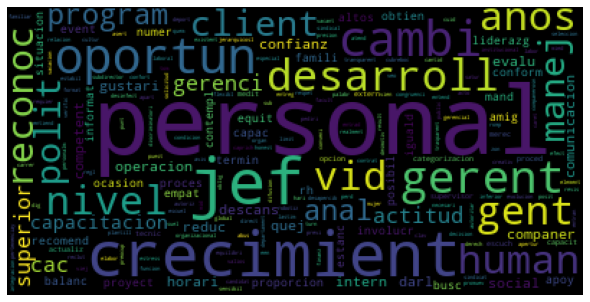

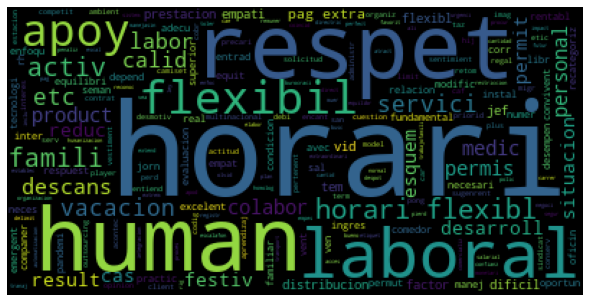

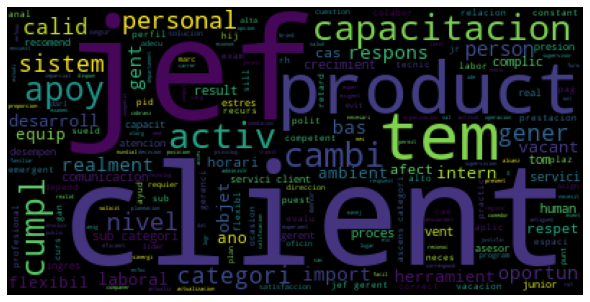

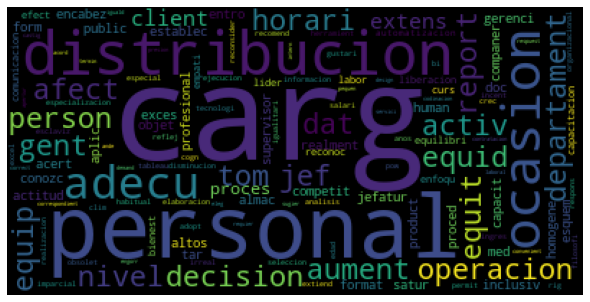

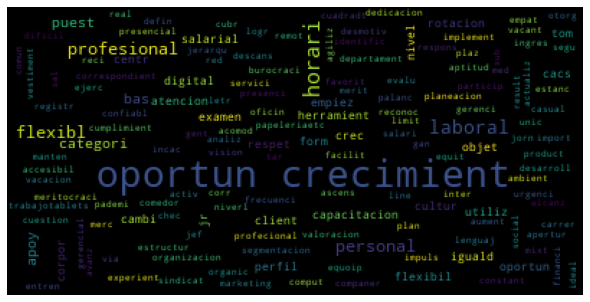

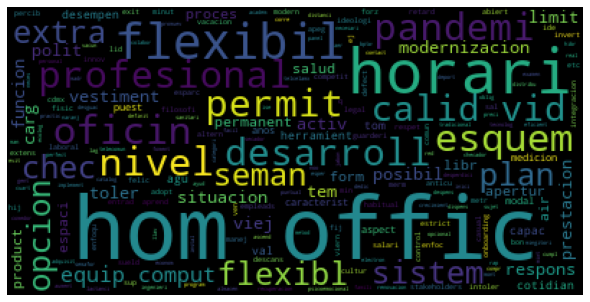

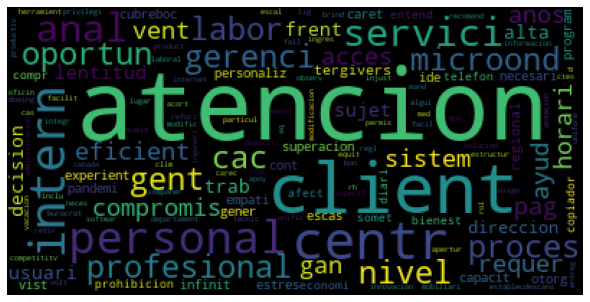

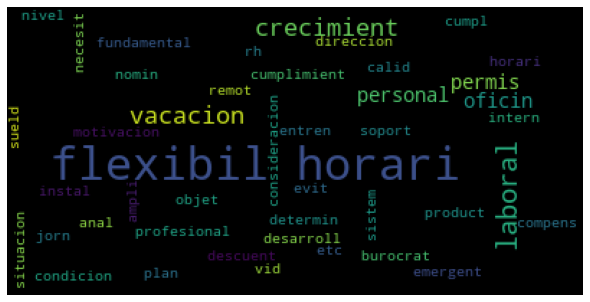

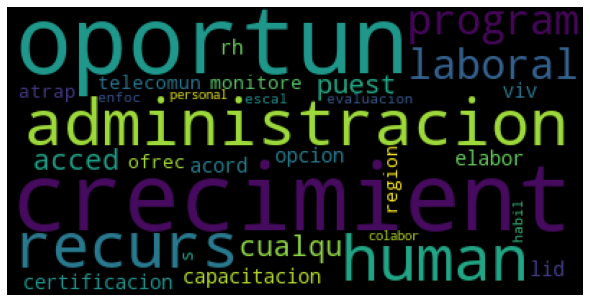

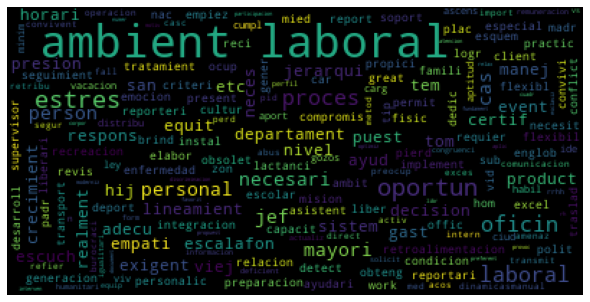

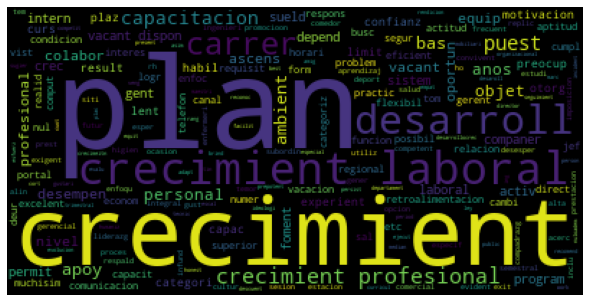

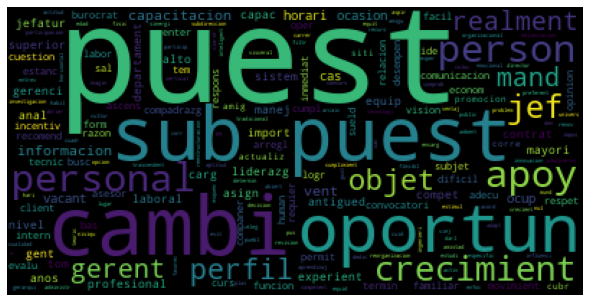

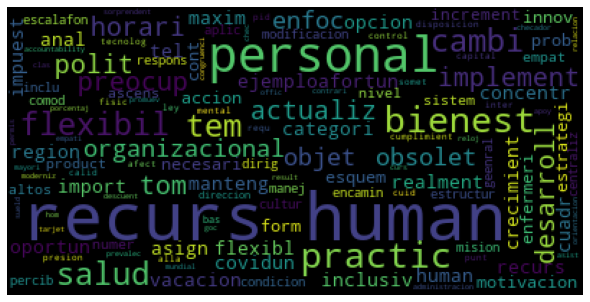

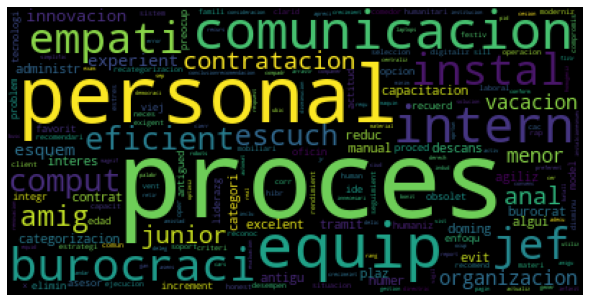

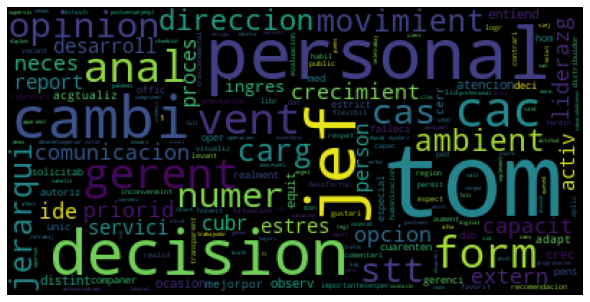

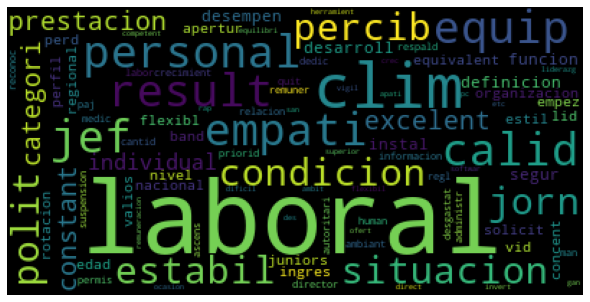

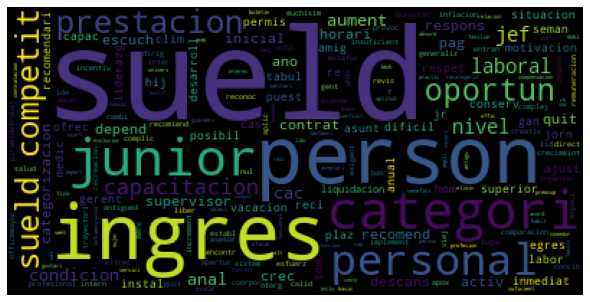

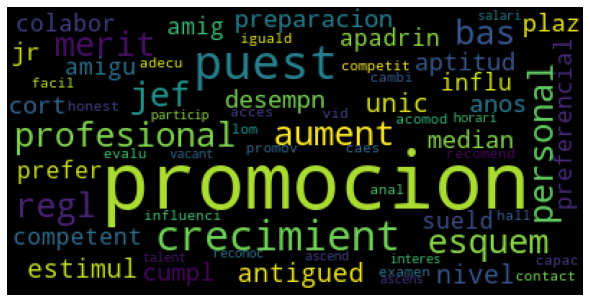

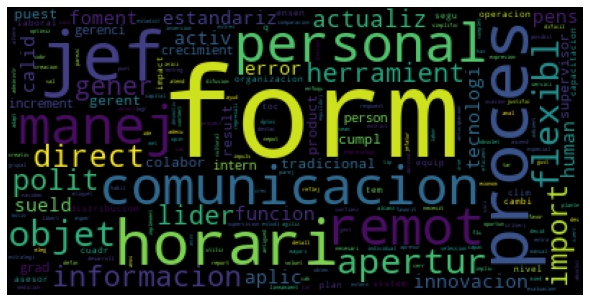

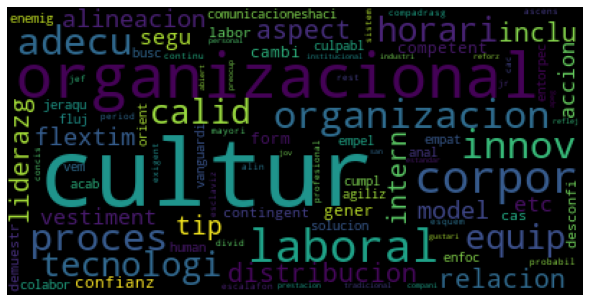

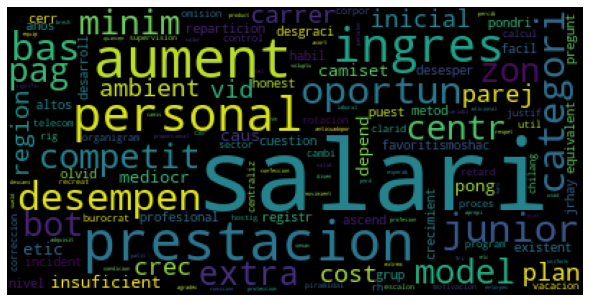

In [152]:
for i,row in aux.iterrows():
    wc = WordCloud()
    wc.generate_from_text(row['Clean_Text'])
    plt.figure(figsize = (8, 8), facecolor = None)
    plt.imshow(wc)
    plt.axis("off")
    plt.tight_layout(pad = 0)
    plt.show()

In [611]:
ct['Temas']=ct['cl_cv'].map(lambda x: 'Calidad de Vida' if x in [5,7,1,18,19] else 'Oportunidad de Crecimiento' if x in [4,10,11,8,17] else 'Trato Humano' if x in [15,0,9,12,14] else 'Capacitación/ Otros' if x==2 else 'CACs' if x==6 else 'Sueldos/Prestaciones' if x in [16,20] else 'Otros')

In [610]:
ct['Sub_Temas']=ct['cl_cv'].replace({0:'Jefes', 1:'Horarios Justos', 2:'Otros',3:'Distribución Equitativa de Trabajo',4:'Oportunidad de Crecimiento',5:'Home Office',6:'CAC',7:'Flexibilidad de Horarios',8:'Programas de Crecimiento', 9:'Ambiente Laboral', 10:'Crecimiento Laboral',11:'Oportunidad de Crecimiento', 12:'Preocupación por el Empleado',13: 'Burocracia', 14:'Jefes', 15:'Buen Trato', 16:'Sueldos/Prestaciones', 17:'Programas de Crecimiento',18:'Vanguardia Corporativa', 19:'Vanguardia Corporativa', 20:'Sueldos/Prestaciones'})

In [612]:
ct['Temas'].value_counts()

Calidad de Vida               222
Oportunidad de Crecimiento    221
Otros                         217
Trato Humano                  183
Capacitación/ Otros           149
Sueldos/Prestaciones          123
CACs                           27
Name: Temas, dtype: int64

In [613]:
ct

Text  \
index                                                      
0               Capacitación y desarrollo del personal\n   
1                       Capacitación y trabajo en equipo   
9      Falta planeación de las carreras de los emplea...   
18                             Depende el área a laborar   
22     Eliminar un poco la democracia entre las áreas...   
...                                                  ...   
8045      Mejorar el criterio para aumento de categorías   
8051                           CAPACITACION DE PERSONAL    
8053   SUELDO PRESTACIONES Y UN MEDICO EN LAS INSTALA...   
8058   Ajustar sueldos para personal que ingreso de o...   
8063   Que es muy complicado cambiar de puesto de tra...   

                                              Clean_Text  cl_cv  \
index                                                             
0                  capacitacion y desarroll del personal      0   
1                         capacitacion y trabaj en equip     10   
9      falt planeacion de las carrer de los emple y d...      2   
18                                 depend el are a labor      1   
22     elimin un poc la democraci entre las are integ...     13   
...                                                  ...    ...   
8045             mejor el criteri par aument de categori     16   
8051                            capacitacion de personal     16   
8053           sueld prestacion y un medic en las instal     16   
8058   ajust sueld par personal que ingres de outsour...     16   
8063   que es muy complic cambi de puest de trabaj po...     11   

                            Temas                   Sub_Temas  
index                                                          
0                    Trato Humano                       Jefes  
1      Oportunidad de Crecimiento         Crecimiento Laboral  
9             Capacitación/ Otros                       Otros  
18                Calidad de Vida             Horarios Justos  
22                          Otros                  Burocracia  
...                           ...                         ...  
8045         Sueldos/Prestaciones        Sueldos/Prestaciones  
8051         Sueldos/Prestaciones        Sueldos/Prestaciones  
8053         Sueldos/Prestaciones        Sueldos/Prestaciones  
8058         Sueldos/Prestaciones        Sueldos/Prestaciones  
8063   Oportunidad de Crecimiento  Oportunidad de Crecimiento  

[1142 rows x 5 columns]

In [614]:
df

StartDate             EndDate      Status        IPAddress  \
0     2020-05-18 11:53:23 2020-05-18 11:56:45  IP Address  189.216.140.252   
1     2020-05-18 11:53:34 2020-05-18 11:57:45  IP Address   189.144.186.31   
2     2020-05-18 11:51:13 2020-05-18 11:58:06  IP Address   187.216.195.65   
3     2020-05-18 11:52:39 2020-05-18 11:58:14  IP Address   200.68.128.166   
4     2020-05-18 11:55:25 2020-05-18 12:01:19  IP Address   187.216.195.65   
...                   ...                 ...         ...              ...   
8060  2021-11-24 09:38:03 2021-11-24 10:30:22  IP Address   200.38.208.194   
8061  2021-11-24 15:54:19 2021-11-24 15:58:39  IP Address  187.216.215.130   
8062  2021-11-26 11:06:54 2021-11-26 11:08:28  IP Address   187.216.215.18   
8063  2021-11-26 09:37:50 2021-11-26 11:24:08  IP Address    200.68.168.50   
8064  2021-11-26 09:41:29 2021-11-29 09:52:54  IP Address  187.216.195.110   

     Progress Duration (in seconds) Finished         RecordedDate  \
0         100                   202     True  2020-05-18 11:56:45   
1         100                   250     True  2020-05-18 11:57:45   
2         100                   412     True  2020-05-18 11:58:06   
3         100                   335     True  2020-05-18 11:58:15   
4         100                   353     True  2020-05-18 12:01:20   
...       ...                   ...      ...                  ...   
8060       41                  3139    False  2021-12-01 10:30:25   
8061       18                   259    False  2021-12-01 15:58:42   
8062       14                    93    False  2021-12-03 11:08:32   
8063       45                  6377    False  2021-12-03 11:24:12   
8064       41                259885    False  2021-12-06 09:52:56   

             ResponseId RecipientLastName  ...   FECHA_NPS  \
0     R_1lo4jntp4eaVa47               NaN  ...  01/05/2020   
1     R_3EukWJsgTj4mo1o               NaN  ...  01/05/2020   
2     R_2tM78laEgyKYLHb               NaN  ...  01/05/2020   
3     R_5tZqAjD994I94I1               NaN  ...  01/05/2020   
4     R_eP24MdZFMUKNeyB               NaN  ...  01/05/2020   
...                 ...               ...  ...         ...   
8060  R_6PrG3MyeQCUOaxr               NaN  ...     2021 11   
8061  R_3U9sRuzXZmLt2P7               NaN  ...     2021 11   
8062  R_3PjyRlbnMtdT5FR               NaN  ...     2021 11   
8063  R_240hcGf0LYXL5Uj               NaN  ...     2021 11   
8064  R_2Cdnu77ZAYtGhsL               NaN  ...     2021 11   

                                             MEJORA_TXT PROCESO_TXT  \
0            Oportunidad/crecimiento laboral;desarrollo         NaN   
1       Herramientas adecuadas que faciliten el trabajo         NaN   
2     Evaluaciones de conocimientos y aptitudes,Plan...         NaN   
3     Mejorar/automatizar procesos internos/procedim...         NaN   
4     Cursos de actualizacion; motivacionales;lidera...         NaN   
...                                                 ...         ...   
8060                                                NaN         NaN   
8061                                                NaN         NaN   
8062                                                NaN         NaN   
8063                                                NaN         NaN   
8064                                                NaN         NaN   

                                                Mejoras fechayHora  \
0     Desarrollo del Personal/Capacitación/Crecimien...        NaN   
1     Homeoffice/Bonos de productividad/Herramientas...        NaN   
2     Abrir canales para expresar propuestas/Actuali...        NaN   
3     Comunicación efectiva/Capacitación funcional/E...        NaN   
4     Cursos excel, access/Cursos de actualizaciones...        NaN   
...                                                 ...        ...   
8060  mantener la comunicacion /cumpliendo metas u o...        NaN   
8061  Actividades claras/Tiempo de cumplimiento/Segu...        NaN   
8062                  

In [617]:
df=pd.concat([df,ct[['Temas','Sub_Temas']]],axis=1)

# Export

In [619]:
df.to_csv('Experiencia_Colaborador_Temas_202112.csv')

In [554]:
avr=df[df['Q4'].notna()][['Temas','Q4']]

In [555]:
avr

Temas  \
0                   Trato Humano   
1     Oportunidad de Crecimiento   
9            Capacitación/ Otros   
18               Calidad de Vida   
22                         Otros   
...                          ...   
8045        Sueldos/Prestaciones   
8051        Sueldos/Prestaciones   
8053        Sueldos/Prestaciones   
8058        Sueldos/Prestaciones   
8063  Oportunidad de Crecimiento   

                                                     Q4  
0              Capacitación y desarrollo del personal\n  
1                      Capacitación y trabajo en equipo  
9     Falta planeación de las carreras de los emplea...  
18                            Depende el área a laborar  
22    Eliminar un poco la democracia entre las áreas...  
...                                                 ...  
8045     Mejorar el criterio para aumento de categorías  
8051                          CAPACITACION DE PERSONAL   
8053  SUELDO PRESTACIONES Y UN MEDICO EN LAS INSTALA...  
8058  Ajustar sueldos para personal que ingreso de o...  
8063  Que es muy complicado cambiar de puesto de tra...  

[1142 rows x 2 columns]

In [535]:
avr[avr['Temas']=='Capacitación/ Otros']['Q4'].sample(10).values

array(['LA EXIGENCIA DEBE SER IGUAL PARA TODAS LAS AREAS, SIENTO QUE EXISTEN AREAS CON SUELDOS IGUALES Y MENOS RESPONSABILIDAD',
       'Mayor comunicación entre las areas. Evitar el "amiguismo", "compadrazgo" entre los miembros de trabajo con jefes, gerentes y directores de área. Respeto de ideales al personal por parte de los jefes y gerentes de área.',
       'MUCHA MAS FLEXIBILIDAD CON SUS EMPLEADOS SIN QUE ESTOS ULTIMOS SE VEAN AFECTADOS, ESPECIALMENTE LOS QUE ESTAMOS EN CENTROS DE ATENCION YA QUE SOMOS LA PARTE MEDULAR DE ESTA EMPRESA, NUESTRO NIVEL DE EXIGENCIA ES MAS ALTO Y CON MAYOR RAZON DEBE TAMBIEN DE HABER FLEXIBILIDAD CON LOS ENPLEADOS SOBRE TODO CUANDO SE PRESENTAN EVENTOS QUE AMERITEN NUESTRA PRESENCIA Y QUE MUCHAS VECES SE LE HA TENIDO QUE NEGAR AL EMPLEADO. ME GUSTA MUCHO MI TRABAJO PERO DEBO DE CONFESAR QUE EN ALGUNAS OCASIONES HE SENTIDO QUE EL LADO HUMANO HACIA NOSOTROS NO EXISTE',
       'la competencia interna, y el apoyo al crecimiento . Que se valore la product

In [620]:
df['EndDate']=pd.to_datetime(df['EndDate'])

In [621]:
df['Periodo']=df['EndDate'].dt.to_period('M')

In [625]:
df.groupby(['Periodo','Temas','Sub_Temas'])['EMP'].count().to_excel('Pivote_Temas_Por_Mes.xlsx')

In [632]:
df.groupby(['Temas','Sub_Temas'])['EMP'].count().to_excel('Pivote_Temas_SubTemas.xlsx')

In [635]:
df['Temas'].value_counts()

Calidad de Vida               222
Oportunidad de Crecimiento    221
Otros                         217
Trato Humano                  183
Capacitación/ Otros           149
Sueldos/Prestaciones          123
CACs                           27
Name: Temas, dtype: int64

In [558]:
aux=df.groupby(['Periodo','Temas'])['EMP'].count().unstack().fillna(0)

In [566]:
emp=df.groupby([df['Periodo'],'Q3_NPS_GROUP'])['EMP'].count().unstack()

In [570]:
emp

Q3_NPS_GROUP  Detractor  Pasivo  Promotor
Periodo                                  
2020-05               0       0         0
2020-06              16      81       704
2020-07              17      88       712
2020-08              13      76       683
2020-09              12      64       418
2020-10              15      59       435
2020-11              12      51       286
2020-12               6      58       478
2021-01              10      40       344
2021-02              13      44       336
2021-03               7      52       325
2021-04              12      33       264
2021-05              14      40       240
2021-06              12      48       368
2021-07              23      63       414
2021-08              15      50       289
2021-09               9      25       140
2021-10               7      35       146
2021-11              12      28        87

In [571]:
emp=(((emp['Promotor']-emp['Detractor'])/emp.sum(axis=1).astype('int'))*100)

In [581]:
pd.concat([emp,aux],axis=1).corr()

0      CACs  Calidad de Vida  \
0                           1.000000 -0.353792        -0.138682   
CACs                       -0.353792  1.000000        -0.098386   
Calidad de Vida            -0.138682 -0.098386         1.000000   
Capacitación/ Otros         0.041673  0.200139        -0.206384   
Oportunidad de Crecimiento  0.261103 -0.305855        -0.345565   
Otros                       0.077129 -0.072939        -0.124268   
Sueldos/Prestaciones       -0.233766  0.034185        -0.221498   
Trato Humano                0.058825 -0.010567        -0.248262   

                            Capacitación/ Otros  Oportunidad de Crecimiento  \
0                                      0.041673                    0.261103   
CACs                                   0.200139                   -0.305855   
Calidad de Vida                       -0.206384                   -0.345565   
Capacitación/ Otros                    1.000000                   -0.129096   
Oportunidad de Crecimiento            -0.129096                    1.000000   
Otros                                 -0.499300                    0.009813   
Sueldos/Prestaciones                  -0.247343                   -0.459684   
Trato Humano                           0.048517                   -0.391261   

                               Otros  Sueldos/Prestaciones  Trato Humano  
0                           0.077129             -0.233766      0.058825  
CACs                       -0.072939              0.034185     -0.010567  
Calidad de Vida            -0.124268             -0.221498     -0.248262  
Capacitación/ Otros        -0.499300             -0.247343      0.048517  
Oportunidad de Crecimiento  0.009813             -0.459684     -0.391261  
Otros                       1.000000             -0.080676     -0.320563  
Sueldos/Prestaciones       -0.080676              1.000000      0.429712  
Trato Humano               -0.320563              0.429712      1.000000

In [582]:
pd.concat([emp,aux],axis=1).corr(method='spearman')

0      CACs  Calidad de Vida  \
0                           1.000000 -0.218883        -0.223942   
CACs                       -0.218883  1.000000        -0.058092   
Calidad de Vida            -0.223942 -0.058092         1.000000   
Capacitación/ Otros         0.025800  0.290460        -0.226006   
Oportunidad de Crecimiento  0.165204 -0.254284        -0.331440   
Otros                      -0.087719 -0.087138        -0.073271   
Sueldos/Prestaciones        0.250774 -0.015560        -0.226006   
Trato Humano                0.256066  0.005708        -0.406815   

                            Capacitación/ Otros  Oportunidad de Crecimiento  \
0                                      0.025800                    0.165204   
CACs                                   0.290460                   -0.254284   
Calidad de Vida                       -0.226006                   -0.331440   
Capacitación/ Otros                    1.000000                   -0.106350   
Oportunidad de Crecimiento            -0.106350                    1.000000   
Otros                                 -0.426213                    0.092927   
Sueldos/Prestaciones                  -0.304438                   -0.488384   
Trato Humano                           0.208570                   -0.413223   

                               Otros  Sueldos/Prestaciones  Trato Humano  
0                          -0.087719              0.250774      0.256066  
CACs                       -0.087138             -0.015560      0.005708  
Calidad de Vida            -0.073271             -0.226006     -0.406815  
Capacitación/ Otros        -0.426213             -0.304438      0.208570  
Oportunidad de Crecimiento  0.092927             -0.488384     -0.413223  
Otros                       1.000000             -0.145511     -0.290139  
Sueldos/Prestaciones       -0.145511              1.000000      0.452246  
Trato Humano               -0.290139              0.452246      1.000000

In [573]:
aux=aux.div(aux.sum(axis=1),axis=0)

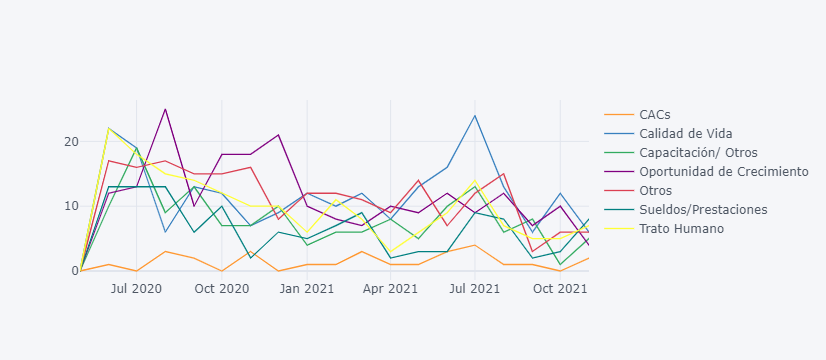

In [559]:
aux.iplot()

In [427]:
avr.loc[5064]['Q4']

'El reemplazo mas frecuente de herramientas de trabajo y con los niveles de calidad reconocidos a nivel mundial'

In [ ]:
aux["cl_cv"].value_counts(True).reset_index().iplot(kind="pie", labels='index',values='cl_cv',hole=.7, title='Clientes por Cluster')

In [ ]:
aux[aux['cl_cv']==1]['Tema1'].value_counts()

In [ ]:
aux[aux['cl_cv']==0]['Tema1'].value_counts()

In [ ]:
aux[aux['cl_cv']==3]['Tema1'].value_counts()

In [ ]:
aux[aux['cl_cv']==2]['Tema1'].value_counts()

In [ ]:
aux[aux['cl_cv']==4]['Tema1'].value_counts()